<font size="5"> Brief demo of Deep-DSCM </font>

<font size="5"> Generate the dataset </font> 

<font size="3">
Before generate the dataset, please deposit the raw data first. The data should be categorized into folders. It's suggested to store the files in "index + HR_name.tif" format, for example, "1_STED.tif". 
</font> 

In [ ]:
from dataset.raw_data_gen import distribution_demo

# read_dir for the raw data, put your data in this folder
read_dir = r"data\STED_data\demo"

train_dir_HR = r"data2\train_HR"
test_dir_HR = r"data2\test_HR"

# The name of folders (compoenents). 
tags = ['Micro', 'Mito']
save_list = ['Micro', 'Mito']
# Interval of validation. 
val_interval = 9
# Those images' size smaller than this value will be excluded. 
size = 512
distribution_demo(read_dir=read_dir, train_dir_HR=train_dir_HR, HR_name="STED", val_dir_HR=test_dir_HR, 
tags=tags, save_list=save_list, val_interval=val_interval, size=size)


<font size="5"> Train the network </font> 

<font size="3">
Here are two ways of training, the difference is to execute the degradation process inside model / outside model. They do the same function, while one can allocate cpu cores to boost the training easier in outside mode. 
</font> 


Before running the codes, please set the options (options/train_in_model.yml or options/train_with_data.yml). 

Important hyperparameters: 

Degradation_resolution (int / float), gives a target resolution for single-channel low-resolution image; 

noise_level (float), gives a parameter for Poisson noise; 

Average (int): designate the number of frames for averaging;

resolution (dict): The resolution for involved HR components, the dict index should be same as elements in category (list); 

category (list): The list containing the name of components, should be same as those prepared in previous section; 

factor_list (list): The list containing integers for brightness of each component. 


In [ ]:
# train in model (default)
if 1:
    from train_DSCM_in_model import *
    main()
# train with dataset
if 0:
    from train_DSCM_with_dataset import *
    main()

<font size="5"> Run the trained network on real-world confocal microscopy data </font>

<font size="3">
Here we provide a demo for Microtubules-Mitochondria confocal data, one can run this code with the provided weights. 
</font>

-----------------------------Using GPU-----------------------------


0:   0%|          | 0/1 [00:00<?, ?it/s]

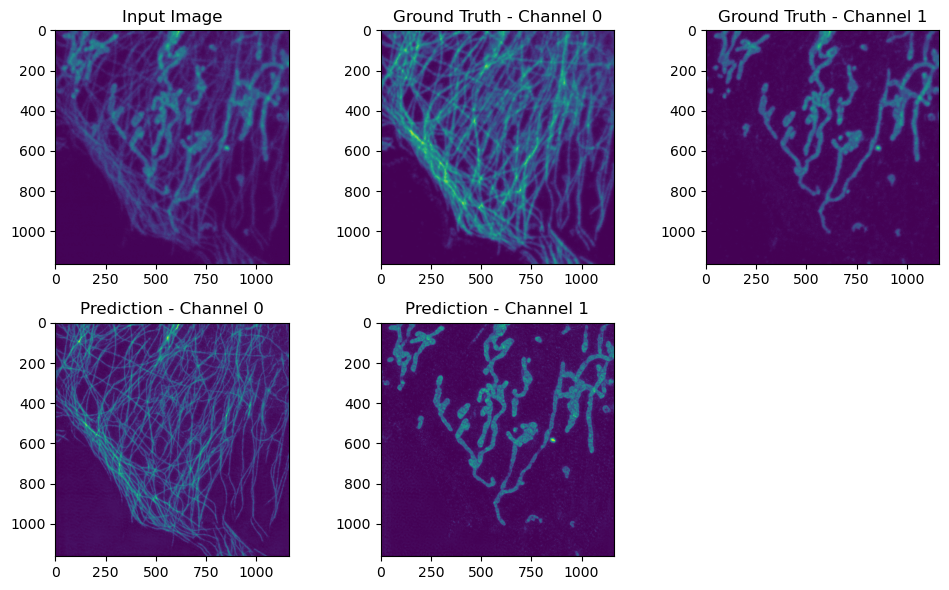

0: 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


In [1]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print('-----------------------------Using GPU-----------------------------')
else:
    device = "cpu"
    print('-----------------------------Using CPU-----------------------------')

from visualization_eval_DSCM import *

# The generated images will be saved in the save_dir. 
weights_dir = r"visualization\Demo\Trained_weights\Microtubules_Mitochondria_228_0.010_4.pth"
read_dir = r"visualization\Demo\Microtubules_Mitochondria_real-data\data"
save_dir = r"visualization\Demo\Microtubules_Mitochondria_real-data\results"
DSCM_enhancement(weights_dir=weights_dir, read_dir=read_dir, save_dir=save_dir, show_image=True)
